In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
plt.style.use("default")

df = pd.read_csv("archive/Plant2_summed_dataset.csv")
df["DATE_TIME"] = df["DATE_TIME"].apply(pd.to_datetime)
ts = TimeSeriesSplit(n_splits = 7)

y = df["AC_POWER"]
X = df.drop(["AC_POWER", "DATE_TIME"], axis=1).loc[:, ["IRRADIATION", "MODULE_TEMPERATURE"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=6/34)
    
params_alpha = {
    "alpha": np.logspace(-10, 2, 100),    
}

params_en = params_alpha
params_en["l1_ratio"] = np.logspace(-10, 5, 100)

X

,IRRADIATION
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3254,0.0
3255,0.0
3256,0.0
3257,0.0


# OLS

In [150]:
ols = LinearRegression()
ols1 = LinearRegression()
cvs = cross_val_score(ols, X_train, y_train, cv = ts, n_jobs = -1)
np.mean(cvs)

0.7810366300869331

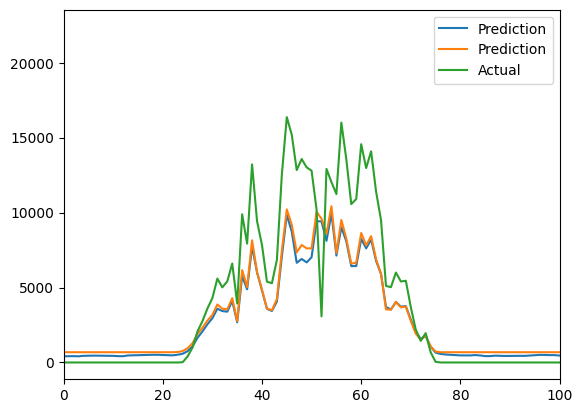

In [164]:

ols.fit(X_train, y_train)
ols1.fit(X_train.loc[:, ["IRRADIATION"]], y_train)

plt.plot(ols.predict(X_test), label="Prediction")
plt.plot(ols1.predict(X_test.loc[:, ["IRRADIATION"]]), label="Prediction")


plt.plot(y_test.to_numpy(), label="Actual")
plt.xlim(0, 100)
plt.legend()

Fitting 7 folds for each of 100 candidates, totalling 700 fits
{'alpha': 3.5111917342151275}
0.7689137078362664


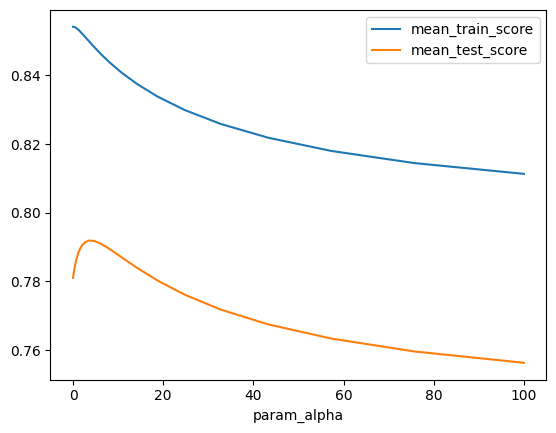

In [149]:


grid = GridSearchCV(Ridge(), param_grid=params, cv=ts, n_jobs=-1, return_train_score=True, verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
#print(results.loc[:,'mean_test_score'])

results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.

plt.legend()

In [ ]:


pred = grid.predict(X_test.loc[:, ["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]])
plt.plot(df.loc[test_index, "DATE_TIME"].to_numpy(),  df.loc[test_index, "AC_POWER"].to_numpy())
plt.plot(df.loc[test_index, "DATE_TIME"].to_numpy(), pred, label="Prediction")
plt.legend()
#print(train_ind